In [4]:
import numpy as np
import imageio
import matplotlib.pyplot as plt

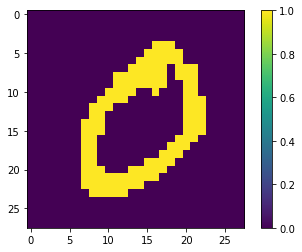

In [5]:
image=np.load('train_image.npy')
image2=(image>100)*1
plt.imshow(image2[1])
plt.colorbar()
plt.show()

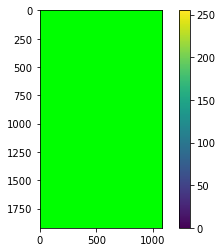

In [6]:
colorful=np.zeros((1920,1080,3)).astype(np.int8)
colorful[:,:,1]=int(255)
plt.imshow(colorful.astype('uint8'))
plt.colorbar()
plt.show()

In [7]:
def enlarge(image,n):
    size=image.shape
    image2=np.zeros((n*size[0],n*size[1]))
    for i in range(n*size[0]):
        for j in range(n*size[1]):
            i2=int(i/n)
            j2=int(j/n)
            image2[i,j]=image[i2,j2]
    return image2

def insert(img):
    screen=np.zeros((1080,1920))
    size=img.shape
    if size[0]>1080 or size[1]>1920:
        print('image is out of screen size')
        return screen
    x1=540-size[0]//2
    x2=x1+size[0]
    y1=960-size[1]//2
    y2=y1+size[1]
    screen[x1:x2,y1:y2]=img
    return screen
    
def combine(img24):
    screen=np.zeros((1080,1920,3)).astype(np.int8)
    for i in range(8):
        for j in range(3):
            img=enlarge(img24[i+j*8],20)*np.power(2,i)
            screen[:,:,j]+=insert(img).astype(np.int8)
    return screen
        

In [8]:
test=combine(image2[:24])

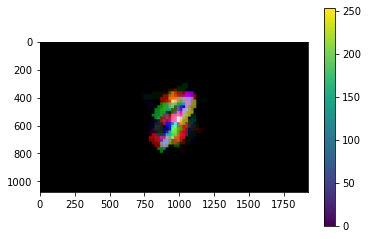

In [9]:
plt.imshow(test.astype('uint8'))
plt.colorbar()
plt.show()

In [41]:
imageio.imwrite('fastimage.png',test.astype('uint8'))